In [22]:
from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.metrics import accuracy_score 
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import numpy as np
import numpy.random as r 
import matplotlib.pyplot as plt 
import cv2

import glob
import matplotlib.gridspec as gridspec #A grid layout to place subplots within a figure.
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

%matplotlib inline 
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sn #for visualization

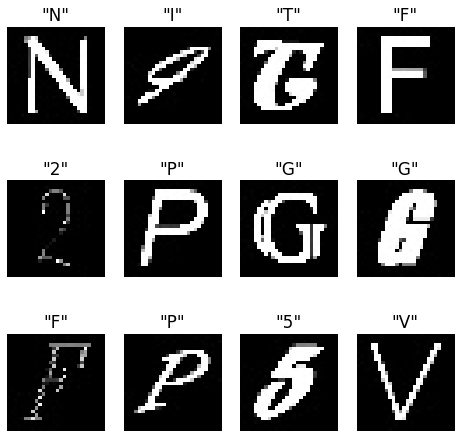

In [30]:
characters = glob.glob("dataset_characters/**/*.jpg")
cols=4
rows=3
fig = plt.figure(figsize=(8,8))
plt.rcParams.update({"font.size":14})
grid = gridspec.GridSpec(ncols=cols,nrows=rows,figure=fig)

# create a random list of images will be displayed
np.random.seed(45)
rand = np.random.randint(0,len(characters),size=(cols*rows))

# Plot example images
for i in range(cols*rows):
    fig.add_subplot(grid[i])
    image = load_img(characters[rand[i]])
    label = characters[rand[i]].split(os.path.sep)[-2]
    plt.title('"{:s}"'.format(label))
    plt.axis(False)
    plt.imshow(image)

In [31]:
X=[]
labels =[]

for image_path in characters:
    image = cv2.imread(image_path, 0) #0 = grayscale
    image = cv2.resize(image, (28, 28)) 
    X.append(image)
    label = image_path.split(os.path.sep)[-2]
    labels.append(label)

    
print(image.shape)
print(image.size)
 
X = np.array(X, dtype = "float")
print(X[10000])
print(labels[10000])
print(len(labels))
print(X.shape)

(28, 28)
784
[[  2.   0.   0.   1.   2.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   3.   0.   0.   2.   1.   0.   2.   0.   0.   0.   0.]
 [  0.   5.   0.   0.   2.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   3.   0.   0.   0.   1.   0.   0.   0.   0.]
 [  0.   0.   0.   3.   0.   0.   1.   1.   0.   0.   0.   0.   0.   0.
    0.   0.   1.   0.   2.   3.   0.   1.   4.   0.   0.   0.   0.   0.]
 [  2.   0.   0.   0.   0.   5.   0. 254. 255. 255. 255. 255. 255. 255.
  255. 255. 255. 255. 252. 252. 255. 253.   0.   0.   0.   0.   0.   0.]
 [  1.   1.   1.   1.   2.   0.   0. 255. 255. 255. 255. 255. 255. 255.
  255. 255. 254. 255. 255. 255. 253. 255.   2.   3.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   4. 254. 255. 255. 255. 255. 255. 255.
  255. 255. 255. 255. 255. 252. 253. 255.   0.   0.   0.   0.   0.   0.]
 [  1.   2.   2.   0.   0.   2.   0.   1.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   1. 255. 255. 255.  41.   0

In [32]:
#print(X[0])
y = np.array(labels)
#y = y.reshape(y.shape[0],1)
print(y.shape)

(37623,)


In [33]:
X = X.reshape(X.shape[0], 784)
print(X)
'''
X_scale = StandardScaler()
X = X_scale.fit_transform(X)
'''
X[0,:] # Looking the new features after scaling
X.shape 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 3. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 2. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


(37623, 784)

In [34]:
#Split the data into training and test set.  60% training and %40 test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train[0])
print(y_train[0])

(22573, 784)
(15050, 784)
(22573,)
(15050,)
[  0.   0.   2.   1.   0.   1.   0.   1.   1.   1.   0.   0.   0.   1.
   2.   0.   0.   2.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.
   2.   0.   0.   0.   1.   1.   0.   0.   0.   0.   2.   0.   1.   0.
   0.   1.   1.   0.   1.   0.   0.   0.   0.   3.   0.   0.   0.   0.
   0.   0.   2.   0.   2.   0.   1.   0.   0.   3.   0.   3.   0.   2.
   2.   0.   0.   3.   0.   1.   1.   2.   0.   0.   0.   0.   0.   0.
   0.   5.   0.   0.   2.   2.   0.   1.   2.   0.   0. 127. 254. 251.
 255. 127.   0.   0.   0.   3.   0.   0.   2.   0.   0.   0.   0.   0.
   0.   0.   1.   0.   0.   0.   5.   0.   0. 254. 255. 255. 255. 255.
 252. 255. 255. 255.   1.   0.   3.   0.   0.   1.   0.   0.   0.   0.
   4.   0.   0.   4.   0.   0.   0.   0. 255. 252. 252. 255. 255. 252.
 255. 254. 255. 255. 253.   2.   0.   4.   0.   1.   0.   0.   0.   0.
   0.   4.   0.   0.   0.   5.   0. 255. 254. 255. 255. 255. 200. 200.
 255. 252. 254. 255. 255. 125.   

In [38]:
model = keras.Sequential([
    keras.layers.Dense(36, input_shape=(784,),activation ='sigmoid') 
]) #stack layers in neural network 
model.compile(optimizer = 'adam', loss = 'mean_squared_error', 
              metrics = ['accuracy']
) #optimizers allow you to train efficiently, loss  can also use mean squared error

model.fit(X_train, y_train, epochs =5) #epochs pretty much num_iters

Epoch 1/5


UnimplementedError:  Cast string to float is not supported
	 [[node mean_squared_error/Cast
 (defined at /Users/liner1/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py:1203)
]] [Op:__inference_train_function_2019]

Errors may have originated from an input operation.
Input Source operations connected to node mean_squared_error/Cast:
In[0] ExpandDims (defined at /Users/liner1/opt/anaconda3/lib/python3.8/site-packages/keras/engine/compile_utils.py:677)

Operation defined at: (most recent call last)
>>>   File "/Users/liner1/opt/anaconda3/lib/python3.8/runpy.py", line 194, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "/Users/liner1/opt/anaconda3/lib/python3.8/runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/traitlets/config/application.py", line 845, in launch_instance
>>>     app.start()
>>> 
>>>   File "/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 612, in start
>>>     self.io_loop.start()
>>> 
>>>   File "/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "/Users/liner1/opt/anaconda3/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
>>>     self._run_once()
>>> 
>>>   File "/Users/liner1/opt/anaconda3/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
>>>     handle._run()
>>> 
>>>   File "/Users/liner1/opt/anaconda3/lib/python3.8/asyncio/events.py", line 81, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/tornado/ioloop.py", line 688, in <lambda>
>>>     lambda f: self._run_callback(functools.partial(callback, future))
>>> 
>>>   File "/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/tornado/ioloop.py", line 741, in _run_callback
>>>     ret = callback()
>>> 
>>>   File "/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 814, in inner
>>>     self.ctx_run(self.run)
>>> 
>>>   File "/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 775, in run
>>>     yielded = self.gen.send(value)
>>> 
>>>   File "/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 365, in process_one
>>>     yield gen.maybe_future(dispatch(*args))
>>> 
>>>   File "/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
>>>     yielded = ctx_run(next, result)
>>> 
>>>   File "/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
>>>     yield gen.maybe_future(handler(stream, idents, msg))
>>> 
>>>   File "/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
>>>     yielded = ctx_run(next, result)
>>> 
>>>   File "/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 543, in execute_request
>>>     self.do_execute(
>>> 
>>>   File "/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
>>>     yielded = ctx_run(next, result)
>>> 
>>>   File "/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 306, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
>>>     return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
>>> 
>>>   File "/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2894, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2940, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3165, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3357, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3437, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "<ipython-input-38-bb44c02261fd>", line 8, in <module>
>>>     model.fit(X_train, y_train, epochs =5) #epochs pretty much num_iters
>>> 
>>>   File "/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1216, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 878, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 867, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 860, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 809, in train_step
>>>     loss = self.compiled_loss(
>>> 
>>>   File "/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 201, in __call__
>>>     loss_value = loss_obj(y_t, y_p, sample_weight=sw)
>>> 
>>>   File "/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py", line 141, in __call__
>>>     losses = call_fn(y_true, y_pred)
>>> 
>>>   File "/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py", line 245, in call
>>>     return ag_fn(y_true, y_pred, **self._fn_kwargs)
>>> 
>>>   File "/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py", line 1203, in mean_squared_error
>>>     y_true = tf.cast(y_true, y_pred.dtype)
>>> 